# Automated pdl layer generation <a class="tocSkip"> 
This notebook explains a method to automatically generate the hj geometry based on the bone geometries

# imports

In [1]:
import numpy as np
import meshplot as mp
import pathlib
import sys
sys.path.append('../')
import cargen

In [2]:
"""
DIRECTORIES:
"""
main_dir = pathlib.Path('..')

# input and output paths
i_dir = '/Volumes/RAINBOW-ESR1/jaw-data/input' 
o_dir = main_dir / 'output'
mid_o_dir = main_dir / 'mid_output' 

# Remove all files inside output directory if it exists, otherwise create it
if o_dir.is_dir():
    for file in o_dir.iterdir():
        if file.is_file():
            file.unlink()
else:
    o_dir.mkdir(exist_ok=False)
    
if mid_o_dir.is_dir():
    for file in mid_o_dir.iterdir():
        if file.is_file():
            file.unlink()
else:
    mid_o_dir.mkdir(exist_ok=False)
 
"""
VALUES:

i_dim, o_dim = input and output dimension ("mm" = millimeters, "m" = meters)
o_format = format you want the files to be save at ( ".obj" , ".stl")
+ scroll down to calibrate the cartilage generation parameters
"""
# dimensions 
i_dim  = "mm"     
o_dim  = "mm"
o_format = ".stl"

# implementation

## read and clean up input

In [3]:
bone_path  = i_dir +"/"+ 'bone.stl'
tooth_path = i_dir +"/"+ 'tooth.stl'
pdl_path   = i_dir +"/"+ 'PDL.stl'

In [4]:
s1_vertices, s1_faces  = cargen.read_and_clean ( bone_path, i_dim )
s2_vertices, s2_faces  = cargen.read_and_clean ( tooth_path, i_dim ) 
s3_vertices, s3_faces  = cargen.read_and_clean ( pdl_path, i_dim ) 

number of triangles 9562
number of triangles 3118
number of triangles 25348


In [5]:
frame = mp.plot( s1_vertices, s1_faces, c = cargen.mandible, shading = cargen.sh_false )
frame.add_mesh ( s2_vertices, s2_faces, c = cargen.tooth, shading = cargen.sh_false )
frame.add_mesh ( s3_vertices, s3_faces, c = cargen.organ, shading = cargen.sh_true )

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-64.55377…

2

## pdl layer

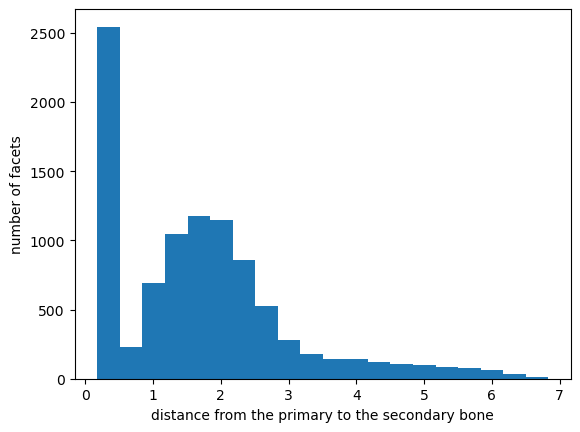

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-64.55377…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-64.55377…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-64.55377…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-64.15190…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-64.55377…

pdl base area is:  117.04
mean pdl thickness is:  0.23
maximum pdl thickness is:  0.28


In [6]:
# set the parameters
param = cargen.Var()

# change the ones you like
param.gap_distance = 0.3
param.trimming_iteration = 1
param.output_name = "pdl"
param.smoothing_iteration = 3
param.thickness_factor = 1

# make it
pdl_vertices, pdl_faces, roof_vertices, roof_faces = cargen.get_pdl_layer(s1_vertices, s1_faces, 
                                                                   s2_vertices, s2_faces,
                                                                   param)

# export results
cargen.save_surface ( pdl_vertices, pdl_faces, o_dim, param.output_name+"_fullmodel", o_dir, o_format)
cargen.save_surface ( roof_vertices, roof_faces, o_dim, param.output_name+"_roof", o_dir, o_format )

# reset the parameters to default values
param.reset()

### export bones

In [7]:
if o_dim == "m" :
    s11_vertices = s1_vertices / 1000
    s22_vertices = s2_vertices / 1000   
    
else :
    s11_vertices = s1_vertices 
    s22_vertices = s2_vertices 


cargen.save_surface ( s11_vertices, s1_faces, o_dim, "bone", o_dir, o_format )
cargen.save_surface ( s22_vertices, s2_faces, o_dim, "tooth", o_dir, o_format )

# voila!

In [8]:
# previous version
frame = mp.plot ( s3_vertices, s3_faces, c = cargen.organ,    shading = cargen.sh_false )
frame.add_mesh  ( s1_vertices, s1_faces, c = cargen.mandible, shading = cargen.sh_false )

# this method
frame2 = mp.plot( pdl_vertices, pdl_faces, c = cargen.organ,  shading = cargen.sh_false )
frame2.add_mesh ( s1_vertices,  s1_faces,  c = cargen.mandible, shading = cargen.sh_false )
frame2.add_mesh ( s2_vertices,  s2_faces,  c = cargen.tooth, shading = cargen.sh_false )

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-64.39069…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-64.38319…

2